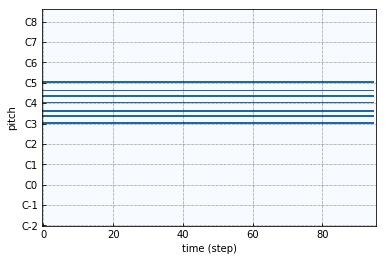

In [1]:
import numpy as np
from pypianoroll import Multitrack, Track
from matplotlib import pyplot as plt

# Create a piano-roll matrix, where the first and second axes represent time
# and pitch, respectively.
pianoroll = np.zeros((96, 128))
# Assign a C major chord to the piano-roll
C_maj = [60, 64, 67, 72, 76, 79, 84]
pianoroll[0:95, C_maj] = 100

# Create a `pypianoroll.Track` instance
track = Track(pianoroll=pianoroll, program=0, is_drum=False,
              name='my awesome piano')

# Plot the piano-roll
fig, ax = track.plot()
plt.show()

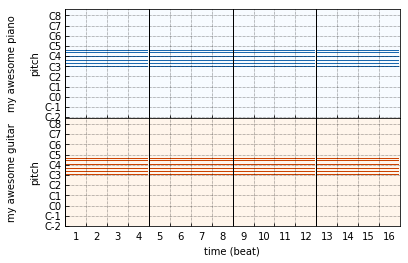

In [2]:
# Extend the piano-roll to demonstrate the usage of down beat array
track.pianoroll = np.tile(track.pianoroll, (4, 1))
downbeats = [0, 96, 192, 288]

# Copy the track to demonstrate the usage of `pypianoroll.Multitrack`
another_track = track.copy()
another_track.program = 24
another_track.name = 'my awesome guitar'

# Create a `pypianoroll.Multitrack` instance
multitrack = Multitrack(tracks=[track, another_track], tempo=120.0,
                        downbeat=[0, 96, 192, 288], beat_resolution=24)

# Plot the multi-track piano-roll
fig, axs = multitrack.plot()
plt.show()

In [3]:
# Save the `pypianoroll.Multitrack` instance to a .npz file
multitrack.save('./test.npz')

# Load the .npz file to a `pypianoroll.Multitrack` instance
loaded = Multitrack('./test.npz')

In [4]:
# Parse a MIDI file to a `pypianoroll.Multitrack` instance
another_multitrack = Multitrack('./sample.mid')

# Write the `pypianoroll.Multitrack` instance to a MIDI file
another_multitrack.write('./test.mid')